# **07. heatmap(히트맵) 실습**
</br>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png">
</br>

* matplotlib 문법 관련 공식 문서 : https://matplotlib.org/stable/api/pyplot_summary.html

* seaborn heatmap 문법 관련 공식 문서 : https://seaborn.pydata.org/generated/seaborn.heatmap.html

## **PART1. 각종 세팅**

In [1]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)

작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [2]:
# 데이터 로드 및 정보 / 요약통계량 확인
# pd.read_csv() 메서드 사용

# 데이터프레임명 : df
# 사용할 rawfile : sw_region_busil_ratio.csv
# 한글 인코딩 형식 : cp949

df = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      341 non-null    object 
 1   지역      341 non-null    object 
 2   부실순증금액  341 non-null    int64  
 3   보증잔액    341 non-null    float64
 4   누적부실금액  341 non-null    int64  
 5   부실률     341 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.1+ KB


,부실순증금액,보증잔액,누적부실금액,부실률
count,341.00,341.00,341.00,341.00
mean,1888181547.28,308152699175.19,14810224512.63,5.08
std,2142892037.77,326054514554.04,20652891349.63,4.05
min,16342457.00,107282159.00,16342457.00,0.12
25%,588566626.00,151180855880.00,2780390190.00,1.63
50%,1188911413.00,170287911150.00,7710304088.00,3.77
75%,2230260879.00,339989422883.00,17766335540.00,8.17
max,11650798295.00,1367840400000.00,134017878897.00,15.28


In [3]:
# 상위 5개 관측치 확인


,yr,지역,부실순증금액,보증잔액,누적부실금액,부실률
0,2022-01,강원,444200077,170287911150.00,444200077,0.26
1,2022-02,강원,365221764,170287911150.00,809421841,0.48
2,2022-03,강원,360999999,170287911150.00,1170421840,0.69
3,2022-04,강원,578309468,170287911150.00,1748731308,1.03
4,2022-05,강원,354169880,170287911150.00,2102901188,1.23


## **PART3. 데이터 집계**

* 주사업장소재지(시도) 및 기준연월별로 집계해서 일종의 피벗테이블 생성
* heatmap 그래프는 피벗테이블에 색을 입힌 것과 유사함
      

In [4]:
# 지역명이 '미상', '세종'이 아닌 관측치만 선택하고, 행을 지역 , 열을 기준연월별로 집계
# pd.pivot_table() 메서드 사용

df_agg = 

yr,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
지역,,,,,,,,,,,,,,,,,,,,
강원,0.26,0.48,0.69,1.03,1.23,1.52,1.74,2.09,2.48,2.97,3.67,4.47,5.25,5.92,6.77,7.60,8.68,9.75,10.70,11.58
경기,0.20,0.39,0.61,0.85,1.08,1.35,1.56,1.87,2.18,2.57,3.09,3.77,4.40,5.07,5.84,6.62,7.37,8.23,8.99,9.80
경남,0.32,0.64,0.89,1.15,1.42,1.83,2.12,2.43,2.95,3.52,4.31,5.23,6.12,7.06,8.06,9.01,10.09,11.18,12.27,13.27
경북,0.24,0.66,0.98,1.30,1.63,1.86,2.10,2.58,3.12,3.78,4.85,5.93,6.87,8.13,9.26,10.47,11.87,13.08,14.17,15.28
광주,0.43,0.63,1.02,1.31,1.70,1.95,2.20,2.52,2.94,3.51,4.14,4.93,5.74,6.69,7.58,8.32,9.49,10.49,11.19,12.06
대구,0.25,0.53,0.83,1.16,1.63,1.91,2.14,2.53,2.95,3.56,4.45,5.66,6.77,7.75,8.83,9.76,11.02,12.07,13.21,14.28
대전,0.24,0.37,0.64,0.96,1.36,1.78,2.05,2.44,2.80,3.29,4.15,5.22,6.08,7.02,7.76,8.79,10.06,11.10,11.79,12.45
부산,0.29,0.51,0.73,1.10,1.40,1.80,2.18,2.59,3.02,3.47,4.15,5.23,6.08,6.92,7.94,9.07,10.17,11.21,12.14,13.26
서울,0.26,0.41,0.63,0.91,1.25,1.50,1.78,2.16,2.59,3.14,4.01,4.93,5.92,6.82,7.85,8.77,9.80,10.73,11.53,12.37


## **PART4. 그래프 생성**

In [5]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

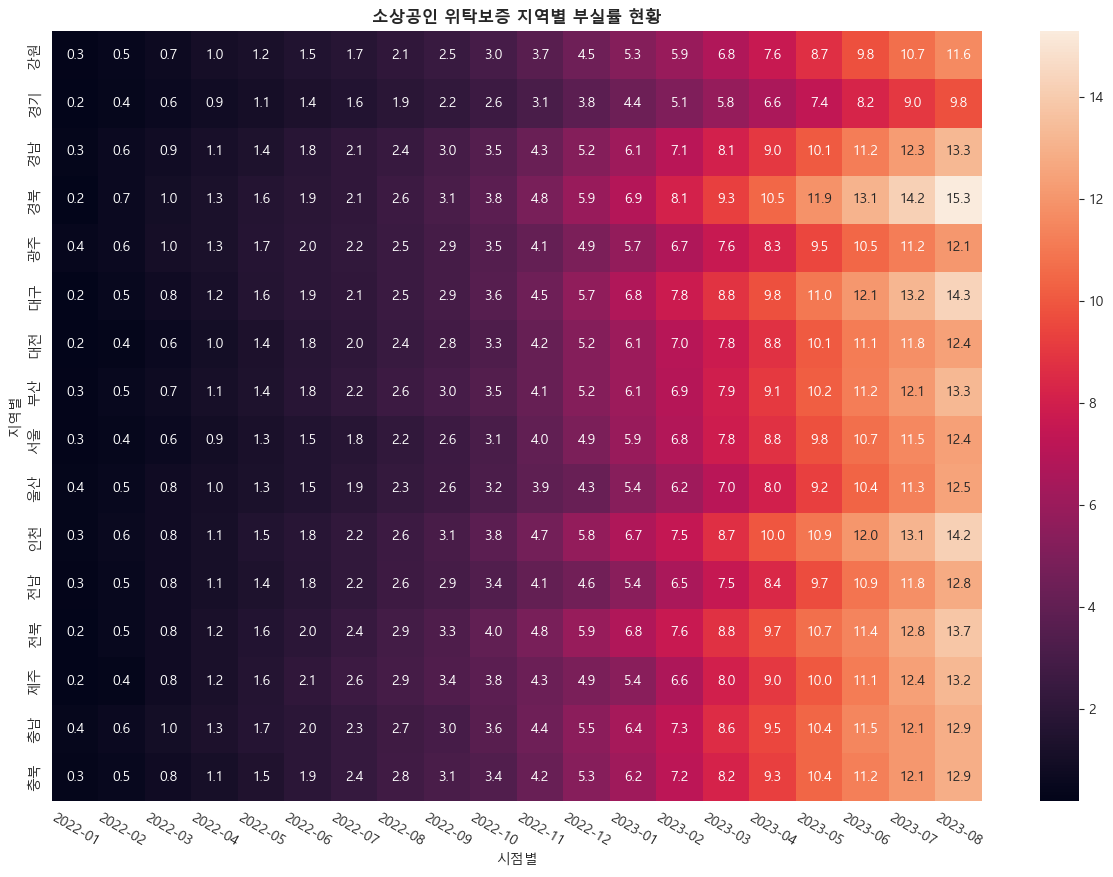

In [7]:
# 도화지 / 좌표계 / 그래프 객체 생성
# '소상공인 위탁보증 지역별 부실률 현황'이라는 제목을 추가하고(글꼴 타입 : 굵게)
# annot = 파라미터를 사용해 셀마다 실제 부실률 수치를 표시
# fmt = 파라미터를 사용해 실제 부실률 수치의 표시형식을 소숫점 첫째자리로 변경
# cbar = 파라미터의 값을 True / False로 바꿔보기
# y축 제목으로 '지역별' / x축 제목으로 '시점별'이라고 표시
# x축 눈금의 값이 안 겹치도록 회전처리
# y축 눈금의 값이 가로로 표시되도록 회전처리

plt.figure(figsize = [15,10])